In [37]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime
import os

import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr


In [38]:
files = os.listdir('ssw_events_saved_filtered/')

In [66]:
# Load all data into one dataframe
df_all = pd.DataFrame()
for file in files:
    df = pd.read_csv("ssw_events_saved/" + file)
    # add an t_ column that is 0 for when SSW_flah is true and increases by 1 after that value and decreases by one before that value
    df['t_'] = 0
    df['t_'] = np.where(df['SSW_flag'] == True, 0, df['t_'])
    df['t_'] = np.where(df['SSW_flag'] == False, df['t_'] + 1, df['t_'])
    df['t_'] = np.where(df['SSW_flag'] == False, df['t_'] - 1, df['t_'])
    
    df = df.sort_values(by='dates', ascending=True)
    df_all = pd.concat([df,df_all])
    
df_all = df_all.sort_values(by='dates', ascending=True)
df_all['index_'] = range(1, len(df_all) + 1)

# # load your time histories into a Pandas DataFrame
# df = pd.read_csv("ssw_events_saved/2009-01-24_ssw.csv")
df_all = df_all.drop(columns=['SSW_','temperature_pct_change'])

# load df_merged into a Pandas DataFrame and merge it with df_all
df_merged = pd.read_csv("df_merged.csv")

# merge df_all and df_merged on all common dates  
df_all = pd.merge(df_all, df_merged[['dates','mf_abs']], on='dates', how='inner')


In [67]:
value = []
for i in range(-25,16):
    value.append(i)


In [68]:
df

,dates,wind_eastward_mean,wind_eastward_mean_selection,temperature_mean_selection,wind_eastward_mean_cos,temperate_mean_cos,temperature_pct_change,SSW_,SSW_flag,t_
0,2003-12-27,16.240319,69.937380,253.914128,8.120160,126.957064,8.715795,False,False,0
1,2003-12-28,4.134246,52.344187,248.214907,2.067123,124.107454,-2.244547,False,False,0
2,2003-12-29,5.100442,38.210684,230.593978,2.550221,115.296989,-7.099062,False,False,0
3,2003-12-30,8.065112,42.754052,225.787432,4.032556,112.893716,-2.084420,False,False,0
4,2003-12-31,7.968783,46.639281,224.081832,3.984391,112.040916,-0.755401,False,False,0
5,2004-01-01,1.466965,39.214770,224.060083,0.733482,112.030041,NaN,False,False,0
6,2004-01-02,-2.233104,32.651871,225.335007,-1.116552,112.667504,0.569010,True,True,0
7,2004-01-03,-6.979064,21.891146,229.206560,-3.489532,114.603280,1.718132,False,False,0
8,2004-01-04,-9.788203,13.438940,230.005514,-4.894101,115.002757,0.348573,False,False,0
9,2004-01-05,-9.319953,9.003029,228.866744,-4.659977,114.433372,-0.495105,False,False,0


In [63]:
len(value)

41

In [40]:
df['year'] = pd.DatetimeIndex(df['dates']).year

In [41]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['index_'], y=df['wind_eastward_mean_cos'], name='wind_eastward_mean_selection', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df['index_'], y=df['mf_abs'], name='mf_abs', line=dict(color='orange'), yaxis='y2'))

# Set layout
fig.update_layout(
    yaxis=dict(
        range=[-50, 80],
        title='wind_eastward_mean_cos'
    )
    ,yaxis2=dict(
        range=[0, 0.005],
        title='Temperature Selection Mean',
        side='right',
        overlaying='y'
    )
    ,xaxis=dict(title='Dates'),
    title=f'ZMZW at 60◦ N latitude and Temperature, 1970 t0 2016',
    legend=dict(orientation="h", y=1.2, x=0.5))

# Show the plot
fig.show()

In [43]:
df

,dates,wind_eastward_mean,wind_eastward_mean_selection,temperature_mean_selection,wind_eastward_mean_cos,temperate_mean_cos,index_,mf_abs,year
345,2018-01-12,36.802911,35.894021,193.407067,18.401455,96.703533,404,0.005340,2018
346,2018-01-13,35.775050,45.111992,192.508725,17.887525,96.254362,405,0.008773,2018
347,2018-01-14,33.788233,53.774738,192.749715,16.894116,96.374857,406,0.005903,2018
348,2018-01-15,30.535844,64.858844,198.135240,15.267922,99.067620,407,0.008746,2018
349,2018-01-16,25.154227,75.345086,203.096840,12.577114,101.548420,408,0.004747,2018
350,2018-01-17,20.735090,90.634035,210.551010,10.367545,105.275505,409,0.004727,2018
351,2018-01-19,15.126380,93.324191,215.877014,7.563190,107.938507,411,0.002450,2018
352,2018-01-20,16.023705,86.636519,215.446958,8.011853,107.723479,412,0.002916,2018
353,2018-01-21,19.878130,95.987760,215.044836,9.939065,107.522418,413,0.002285,2018
354,2018-01-22,21.343102,96.247502,215.033332,10.671551,107.516666,414,0.003018,2018


In [42]:
# group df by year and plot the mean of each year
df_grouped = df.groupby('year')

fig = go.Figure()

for year, df in df_grouped:
    print(year)
    # plot the mean of each year using plotly
    fig.add_trace(go.Scatter(x=df['index_'], y=df['wind_eastward_mean_cos'], name='wind_eastward_mean_selection', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=df['index_'], y=df['mf_abs'], name='mf_abs', line=dict(color='orange'), yaxis='y2'))

    
fig.update_layout(
    yaxis=dict(
        range=[-50, 80],
        title='wind_eastward_mean_cos'
    )
    ,yaxis2=dict(
        range=[0, 0.005],
        title='Temperature Selection Mean',
        side='right',
        overlaying='y'
    )
    ,xaxis=dict(title='Dates'),
    title=f'ZMZW at 60◦ N latitude and Temperature, 1970 t0 2016',
    legend=dict(orientation="h", y=1.2, x=0.5))

# Show the plot
fig.show()

2002
2003
2004
2005
2006
2007
2008
2009
2010
2012
2013
2018


In [138]:
avgs = df.mean()
devs = df.std()

for col in ['mf_abs', 'wind_eastward_mean_cos']:
    df[col] = (df[col] - avgs.loc[col]) / devs.loc[col]

In [139]:
df

,wind_eastward_mean,wind_eastward_mean_selection,temperature_mean_selection,wind_eastward_mean_cos,temperate_mean_cos,index_,mf_abs
0,23.325735,79.704502,207.120967,1.228024,103.560484,165,0.713856
1,22.631023,77.685399,206.989644,1.177318,103.494822,166,0.245704
2,22.457546,83.767626,213.315671,1.164656,106.657835,167,0.896711
3,21.957446,90.501296,208.390503,1.128154,104.195251,168,1.004102
4,22.145954,77.468165,201.703698,1.141913,100.851849,169,2.063910
...,...,...,...,...,...,...,...
421,13.896140,38.462374,207.197588,0.539769,103.598794,604,-0.554887
422,14.519023,41.404893,208.791868,0.585233,104.395934,605,-0.490330
423,14.869889,37.994384,210.189832,0.610842,105.094916,606,-0.498656
424,14.810950,36.276005,212.601860,0.606540,106.300930,607,-0.612849


In [140]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['index_'], y=df['wind_eastward_mean_cos'], name='wind_eastward_mean_selection', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df['index_'], y=df['mf_abs'], name='mf_abs', line=dict(color='orange'), yaxis='y2'))

# Set layout
fig.update_layout(
    yaxis=dict(
        range=[-5, 5],
        title='wind_eastward_mean_cos'
    )
    ,yaxis2=dict(
        range=[-5, 5],
        title='mf_abs',
        side='right',
        overlaying='y'
    )
    ,xaxis=dict(title='Dates'),
    title=f'ZMZW at 60◦ N latitude and Temperature, 1970 t0 2016',
    legend=dict(orientation="h", y=1.2, x=0.5))

# Show the plot
fig.show()

In [141]:
df

,wind_eastward_mean,wind_eastward_mean_selection,temperature_mean_selection,wind_eastward_mean_cos,temperate_mean_cos,index_,mf_abs
0,23.325735,79.704502,207.120967,1.228024,103.560484,165,0.713856
1,22.631023,77.685399,206.989644,1.177318,103.494822,166,0.245704
2,22.457546,83.767626,213.315671,1.164656,106.657835,167,0.896711
3,21.957446,90.501296,208.390503,1.128154,104.195251,168,1.004102
4,22.145954,77.468165,201.703698,1.141913,100.851849,169,2.063910
...,...,...,...,...,...,...,...
421,13.896140,38.462374,207.197588,0.539769,103.598794,604,-0.554887
422,14.519023,41.404893,208.791868,0.585233,104.395934,605,-0.490330
423,14.869889,37.994384,210.189832,0.610842,105.094916,606,-0.498656
424,14.810950,36.276005,212.601860,0.606540,106.300930,607,-0.612849


In [142]:
df = df.diff().dropna()
df['index_'] = range(1, len(df) + 1)


In [143]:
df

,wind_eastward_mean,wind_eastward_mean_selection,temperature_mean_selection,wind_eastward_mean_cos,temperate_mean_cos,index_,mf_abs
1,-0.694712,-2.019103,-0.131323,-0.050706,-0.065662,1,-0.468153
2,-0.173477,6.082227,6.326027,-0.012662,3.163013,2,0.651008
3,-0.500100,6.733670,-4.925168,-0.036502,-2.462584,3,0.107391
4,0.188508,-13.033131,-6.686805,0.013759,-3.343402,4,1.059808
5,0.692887,-7.800788,-1.022626,0.050573,-0.511313,5,1.857341
...,...,...,...,...,...,...,...
421,0.861386,5.857433,1.925503,0.062872,0.962751,421,-0.109482
422,0.622883,2.942519,1.594280,0.045463,0.797140,422,0.064556
423,0.350866,-3.410509,1.397964,0.025609,0.698982,423,-0.008325
424,-0.058939,-1.718379,2.412028,-0.004302,1.206014,424,-0.114193


In [144]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['index_'], y=df['wind_eastward_mean_cos'], name='wind_eastward_mean_selection', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df['index_'], y=df['mf_abs'], name='mf_abs', line=dict(color='orange'), yaxis='y2'))

# Set layout
fig.update_layout(
    yaxis=dict(
        range=[-5, 5],
        title='wind_eastward_mean_cos'
    )
    ,yaxis2=dict(
        range=[-5, 5],
        title='mf_abs',
        side='right',
        overlaying='y'
    )
    ,xaxis=dict(title='Dates'),
    title=f'ZMZW at 60◦ N latitude and Temperature, 1970 t0 2016',
    legend=dict(orientation="h", y=1.2, x=0.5))

# Show the plot
fig.show()

/Users/joaojesus/opt/anaconda3/envs/main_fyp_env/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



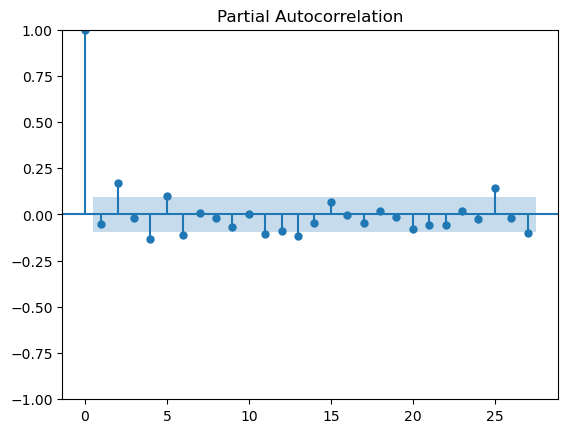

In [145]:
plot_pacf(df['wind_eastward_mean_cos'])
plt.show()

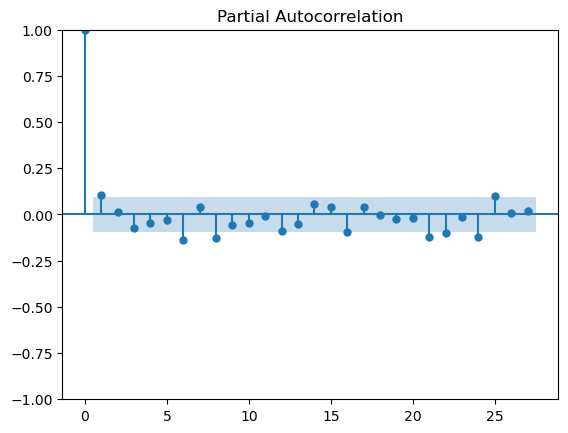

In [146]:
plot_pacf(df['temperature_mean_selection'])
plt.show()

In [147]:
for lag in range(1, 20):
    temp_series = df['temperature_mean_selection'].iloc[lag:]
    wind_series = df['wind_eastward_mean_cos'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(temp_series, wind_series))
    print('------')

Lag: 1
PearsonRResult(statistic=0.005051847442182733, pvalue=0.9173935573615886)
------
Lag: 2
PearsonRResult(statistic=0.08641686613720635, pvalue=0.07583256510510433)
------
Lag: 3
PearsonRResult(statistic=0.08507064576501544, pvalue=0.08088787816421626)
------
Lag: 4
PearsonRResult(statistic=0.04675686273012437, pvalue=0.3385461897424547)
------
Lag: 5
PearsonRResult(statistic=0.010706188650267361, pvalue=0.8268339386402243)
------
Lag: 6
PearsonRResult(statistic=0.07812053215061338, pvalue=0.11032115300710436)
------
Lag: 7
PearsonRResult(statistic=0.07212039572190374, pvalue=0.1410190166866554)
------
Lag: 8
PearsonRResult(statistic=0.01842684232786318, pvalue=0.7075198289393965)
------
Lag: 9
PearsonRResult(statistic=0.05422154375870233, pvalue=0.2698573849005975)
------
Lag: 10
PearsonRResult(statistic=-0.055338271170166715, pvalue=0.2606788491711882)
------
Lag: 11
PearsonRResult(statistic=-0.00029492164052645833, pvalue=0.995226584913711)
------
Lag: 12
PearsonRResult(statisti

In [149]:
df = df[['temperature_mean_selection', 'wind_eastward_mean_cos']]
model = VAR(df)
model_fit = model.fit(maxlags=20)
model_fit.summary()

/Users/joaojesus/opt/anaconda3/envs/main_fyp_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, Apr, 2023
Time:                     17:50:56
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.27556
Nobs:                     405.000    HQIC:                   1.78578
Log likelihood:          -1363.98    FPE:                    4.33314
AIC:                      1.46490    Det(Omega_mle):         3.57308
--------------------------------------------------------------------
Results for equation temperature_mean_selection
                                    coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------------
const                                 -0.005281         0.314936           -0.017           0.987
L1.temperature_mean_selection          0.096285         0.060635     

In [166]:
# get all correlation coefficients into an array from the model
corr = model_fit.summary().count()

AttributeError: 'VARSummary' object has no attribute 'count'

In [191]:
df_params = model_fit.params

# add name to first column in df_params
df_params =df_params.reset_index()

In [192]:
# exclude first row from df_params
df_params = df_params.iloc[1:]

In [195]:
# create a new column with the first two characters of index
df_params['var'] = df_params['index'].str[:3]

In [196]:
# create a new column with the the characters after the first two characters of index
df_params['lag'] = df_params['index'].str[3:]

In [201]:
df_params['var'] = df_params['var'].apply(lambda x: x.strip('.'))
df_params['lag'] = df_params['lag'].apply(lambda x: x.strip('.'))

In [204]:
# select only columns lag where it's equal to wind_eastward_mean_cos
df_params = df_params[df_params['lag'] == 'wind_eastward_mean_cos']

In [209]:
import plotly.express as px

z = [[.1, .3, .5, .7, .9],
     [1, .8, .6, .4, .2],
     [.2, 0, .5, .7, .9],
     [.9, .8, .4, .2, 0],
     [.3, .4, .5, .7, 1]]



fig = px.imshow(z, text_auto=True, aspect="auto")

# add title to the figure

fig.update_layout(
    title="Correlation Matrix",
    xaxis_title="Variables",
    yaxis_title="Variables")
    
fig.show()